In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

#### 1. В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате. 

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.
Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

$H_0\colon$ доли зевающих в контрольной и экспериментальной группах равны.

$H_1\colon$ не равны.

In [2]:
n = 50
n1 = 34
n2 = 16
p1 = 10./34
p2 = 4./16

def proportions_diff_confint_ind(alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)
    
    return (left_boundary, right_boundary)

def proportions_diff_z_test(alternative = 'two-sided'):
    
    P = float(p1 * n1 + p2 * n2) / (n1 + n2)
    
    z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
    
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [3]:
print(f"95% confidence interval for a difference between proportions: {proportions_diff_confint_ind()}")

95% confidence interval for a difference between proportions: (-0.2175577216559601, 0.3057930157736072)


In [4]:
print(f"p-value: {proportions_diff_z_test('greater')}")

p-value: 0.37293045872523534


#### 2. Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными.

Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split(зафиксируйте random state = 1).
На оставшихся 150 настройте два классификатора поддельности банкнот:

   логистическая регрессия по признакам $X_1$, $X_2$,$X_3$;<br>
   логистическая регрессия по признакам $X_4$, $X_5$,$X_6$.
   
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили $5.5×10−85.5\times10^{-8}5.5×10−8$, нужно ввести 8)

In [5]:
banknotes = pd.read_csv('banknotes.txt', sep='\t')
banknotes.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [6]:
banknotes.describe()

,X1,X2,X3,X4,X5,X6,real
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500,0.500000
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266,0.501255
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000,0.000000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000,0.000000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000,0.500000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000,1.000000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000,1.000000


In [7]:
y = banknotes.real
X = banknotes.drop('real', axis=1)

X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=50, random_state=1
)

clf = LogisticRegression(random_state=1)

clf_1 = clf.fit(X_train[['X1', 'X2', 'X3']], y_train)
pred_1 = clf_1.predict(X_test[['X1', 'X2', 'X3']])

clf_2 = clf.fit(X_train[['X4', 'X5', 'X6']], y_train)
pred_2 = clf_2.predict(X_test[['X4', 'X5', 'X6']])

acc1_score = accuracy_score(y_test, pred_1)
acc2_score = accuracy_score(y_test, pred_2)

Clf 1: Accuracy Rate - 0.8, Error Rate - 0.19999999999999996


<AxesSubplot:>

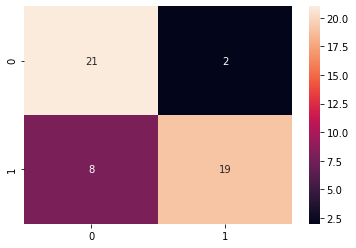

In [8]:
print(f'Clf 1: Accuracy Rate - {acc1_score}, Error Rate - {1 - acc1_score}')
conf_matrix = confusion_matrix(y_test, pred_1)
sns.heatmap(conf_matrix, annot=True)

Clf 2: Accuracy Rate - 0.98, Error Rate - 0.020000000000000018


<AxesSubplot:>

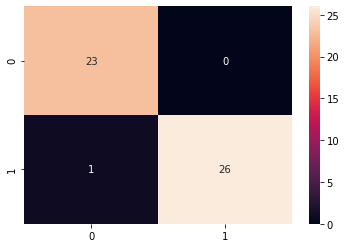

In [9]:
print(f'Clf 2: Accuracy Rate - {acc2_score}, Error Rate - {1 - acc2_score}')
conf_matrix = confusion_matrix(y_test, pred_2)
sns.heatmap(conf_matrix, annot=True)

#### Две выборки зависимые!

$H_0\colon$ доля неверных ответов двух классификаторов одинакова.

$H_1\colon$ не одинакова.

$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

$$Z-статистика: Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$

In [10]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [11]:
error_1 = y_test == pred_1
error_2 = y_test == pred_2
print(tuple(zip(error_1, error_2)))

((True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (False, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (False, True), (True, True), (True, True), (False, True), (False, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (False, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (True, True), (False, True), (False, False), (True, True), (False, True), (True, True), (True, True), (True, True), (True, True), (False, True), (True, True), (False, True), (True, True), (True, True))


In [12]:
print(f"95% confidence interval for a difference between proportions: {proportions_diff_confint_rel(error_2, error_1)}")
print(f"p-value: {proportions_diff_z_test(proportions_diff_z_stat_rel(error_2, error_1))}")

95% confidence interval for a difference between proportions: (0.0735106275786684, 0.2864893724213316)
p-value: 0.0009231887438696518


#### 3. Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.
Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки. 

In [13]:
n_1 = 200000
mu_1 = 525
sigma = 100

n_2 = 100
mu_2 = 541.4

z_stat = (mu_1 - mu_2) / (sigma * np.sqrt(1/n_1 + 1/n_2))

print(f"p-value: {scipy.stats.norm.cdf(z_stat)}")

p-value: 0.050545205867306944


На уровне значимости 0.05 нулевая гипотеза о равенстве средних баллов не отвергается

#### 4. Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. 
Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки. 

In [14]:
mu_2 = 541.5

z_stat = (mu_1 - mu_2) / (sigma * np.sqrt(1/n_1 + 1/n_2))

print(f"p-value: {scipy.stats.norm.cdf(z_stat)}")

p-value: 0.04951365084964981


На уровне значимости 0.05 нулевая гипотеза о равенстве средних баллов отвергается